# Importing Libraries


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import tree
import warnings 
warnings.filterwarnings("ignore")

# reading from dataset

In [2]:
df = pd.read_csv (r'/home/admn/Desktop/niraj/zoo.csv')
print (df)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
x=df.iloc[:,1:17]
x.shape
print(x)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [5]:
y=df.iloc[:,17]
y.shape
print(y)

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,test_size=.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(80, 16) (21, 16) (80,) (21,)


In [26]:
from sklearn.tree import DecisionTreeClassifier
model1 =  tree.DecisionTreeClassifier(criterion="entropy")
model1= model1.fit(x_train,y_train)

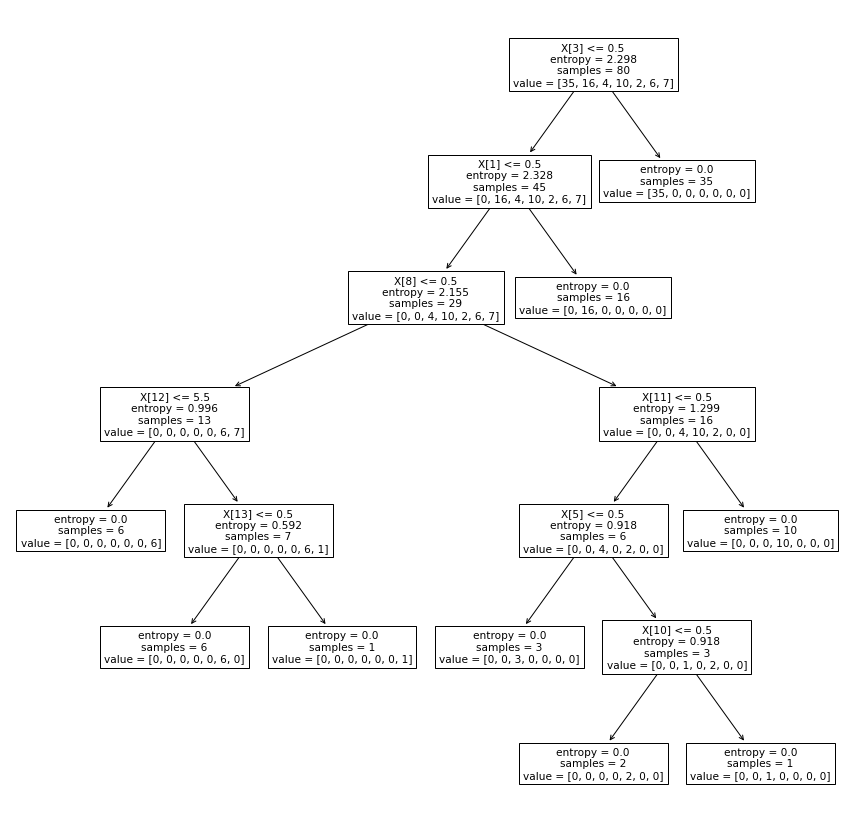

In [27]:
plt.figure(figsize = (15,15))
tree.plot_tree(model1)
plt.show()

In [11]:
pred_y1=model1.predict(x_test)
accuracy=model1.score(x_test,y_test)
print('Accuracy ', accuracy)

Accuracy  0.8571428571428571


In [12]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,pred_y1))

[[9 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 0 0 2 0]
 [0 0 0 3 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]]


In [13]:
print(metrics.classification_report(y_test,pred_y1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.86        21
   macro avg       0.67      0.67      0.67        21
weighted avg       0.86      0.86      0.86        21

